In [1]:
import sys
sys.path.append('..')
import quarantines as Q
import quarantines_mongo as qm
import graph_generators as gg 
import networkx as nx 
import networkit as nk
import pymongo
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from tabulate import tabulate
from scipy import stats
from pprint import pprint
import os 
import random
import experiment_helpers as eh
import utils
import bisect
sns.set()

In [2]:
HIV = gg.load_hiv(scale=1)
G = HIV

In [3]:
tups2 = Q.quarantine_by_prop(G, 2.0, 1.0, 25 / len(G), [0], float('inf'), num_iter=1000)

In [4]:
tups1 = Q.quarantine_by_prop(G, 1.0, 1.0, 25 / len(G), [0], float('inf'), num_iter=1000)

In [5]:
def tup_compare(tupa, tupb):
    plt.hist([_.get_final_R() for _ in tupa], alpha=0.5, color='b', bins=50)
    plt.hist([_.get_final_R() for _ in tupb], alpha=0.5, color='r', bins=50)
    
    

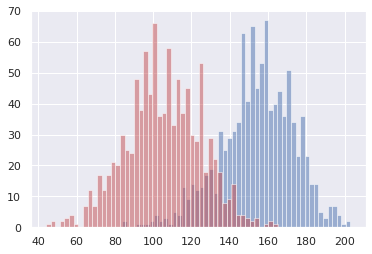

In [6]:
tup_compare(tups2, tups1)

In [7]:
tups2_q100 = Q.quarantine_by_prop(G, 2.0, 1.0, 25 / len(G), [100 / len(G)], float('inf'), num_iter=1000)

In [8]:
min([_.get_final_R() for _ in tups2_q100])

11

In [48]:
vplots = {}
for i in range(50):
    qprop = i / 100
    vplots[qprop] = [Q.quarantine_by_prop(G, 8.0, 1.0, 25 / len(G),qprop, float('inf'), num_iter=1).get_final_R() for _ in range(500)]
    


In [54]:
pairs = [(k, np.mean([_ / len(G) for _ in v]), np.std([_ / len(G) for _ in v])) for k, v in vplots.items()]

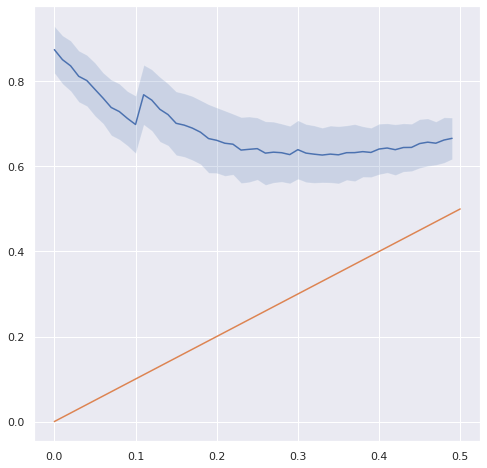

In [58]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(*utils.select_mean(pairs))
ax.fill_between(*utils.plotfill_trips(pairs), alpha=0.2)
plt.plot([0.0, 0.5], [0.0, 0.5])